In [22]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import seaborn as sns

In [23]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [25]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [36]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset

num_round = 20  # the number of training iterations

In [37]:
preds[:5]

array([[0.00702636, 0.9398774 , 0.0530962 ],
       [0.00330976, 0.00454916, 0.992141  ],
       [0.00330976, 0.00454916, 0.992141  ],
       [0.00466867, 0.9888749 , 0.00645646],
       [0.00330976, 0.00454916, 0.992141  ]], dtype=float32)

In [38]:
print(np.argmax(preds[0]))
print(np.argmax(preds[1]))

1
2


In [39]:
from sklearn.metrics import precision_score

best_preds = np.asarray([np.argmax(line) for line in preds])
print ("Numpy array precision:", precision_score(y_test, best_preds, average='macro'))

Numpy array precision: 0.9363636363636364


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

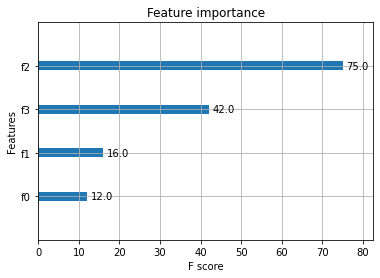

In [40]:
xgb.plot_importance(bst)

In [41]:
dtrain.feature_names

In [42]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(data=iris.target)

In [43]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


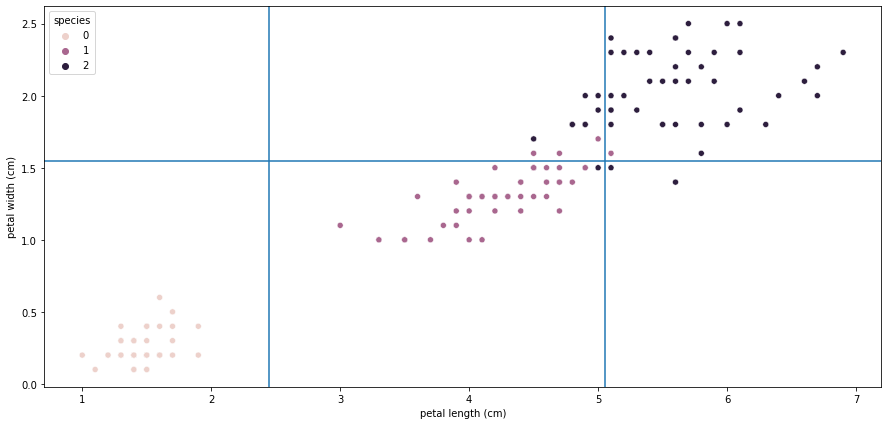

In [44]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.axvline(2.45, 0, 1.0)
plt.axhline(1.55, 0, 1.0)
plt.axvline(5.05, 0, 1.0)